In [ ]:
import json
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
file_path = '/content/710225253737037836.json'
with open(file_path, 'r') as file:
  data = json.load(file)

In [ ]:
# Step 4: Extract and Process Text
messages = data['messages']
all_text = " ".join(message['text'] for message in messages if 'text' in message)
cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())
words = cleaned_text.split()


In [ ]:
# Step 5: Filter Out Stopwords
stop_words = set(["i", "u", "im", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
"yourselves", "he", "him", "his", "she", "her", "hers", "it", "its",
"itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom",
"this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being",
"have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but",
"if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
"against", "between", "into", "through", "during", "before", "after", "above", "below", "to",
"from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then",
"once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few",
"more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
"than", "too", "very", "can", "will", "just", "don", "should", "now", "like", "dont", "one", "thats", "use",
"get", "know", "also", "go", "oh", "think", "good", "need"])  # Replace with your list of stopwords
words = [word for word in words if word not in stop_words]

In [ ]:
# Step 5 Extra: Filter By Word Length
words = [word for word in words if word not in stop_words and len(word) > 4]

In [ ]:
# Step 6: Word Frequency Analysis
word_counts = Counter(words)
top_words = word_counts.most_common(80)

In [ ]:
# Print top words and their counts
print(f"Top words in {file_path.split('/')[-1]}:")
for word, count in top_words:
  print(f"{word}: {count}")

Top words in 710225253737037836.json:
class: 144
would: 78
youre: 71
really: 66
didnt: 63
still: 60
gonna: 58
fucking: 53
doesnt: 49
actually: 48
pretty: 46
right: 45
better: 43
something: 43
going: 41
classes: 41
thought: 41
theres: 41
google: 40
people: 40
justin: 40
first: 40
fuckity: 40
never: 39
memory: 38
project: 36
literally: 36
crying: 36
maybe: 36
probably: 35
using: 34
discord: 34
taking: 34
thing: 33
thank: 32
anyone: 32
semester: 31
someone: 31
wanna: 30
exactly: 29
karni: 29
trying: 29
makes: 29
learn: 29
might: 28
anything: 28
theyre: 27
already: 27
different: 27
things: 26
another: 26
python: 26
whats: 26
write: 26
stuff: 26
every: 26
start: 26
havent: 25
since: 25
could: 25
resume: 25
question: 24
heard: 24
website: 24
svelte: 24
program: 24
daniel: 23
change: 23
projects: 23
check: 23
whole: 22
remember: 22
always: 22
problem: 22
works: 22
understand: 22
though: 21
sorry: 21
imagine: 21
without: 21


<ipython-input-9-647d708258b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(frequencies), y=list(words), palette="mako")


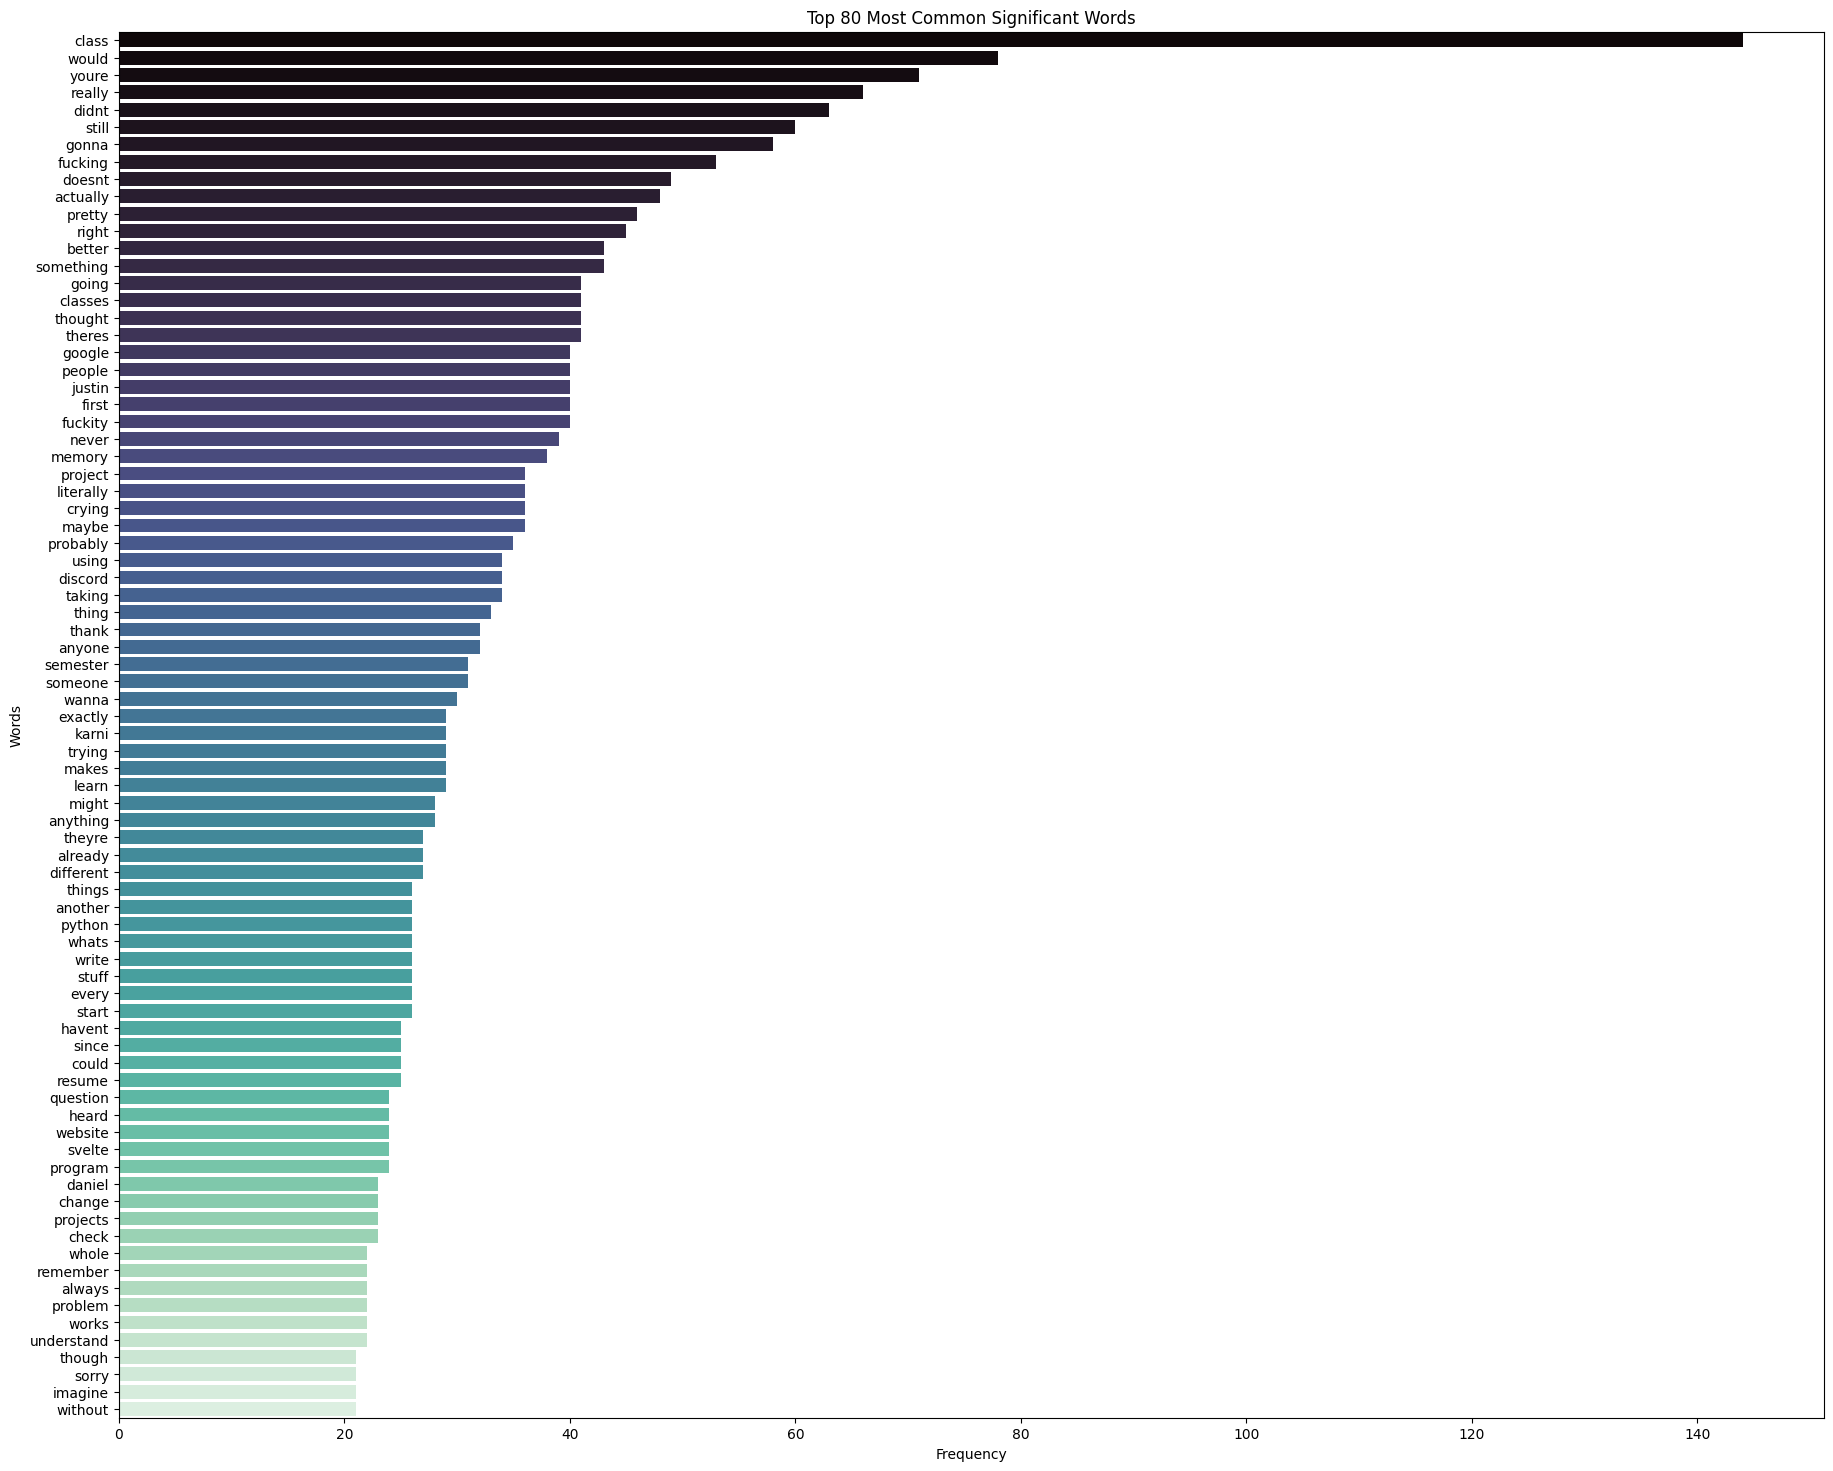

In [ ]:
# Step 7: Create the Bar Graph
words, frequencies = zip(*top_words)
plt.figure(figsize=(22, 18))
sns.barplot(x=list(frequencies), y=list(words), palette="mako")
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 80 Most Common Significant Words')
plt.show()